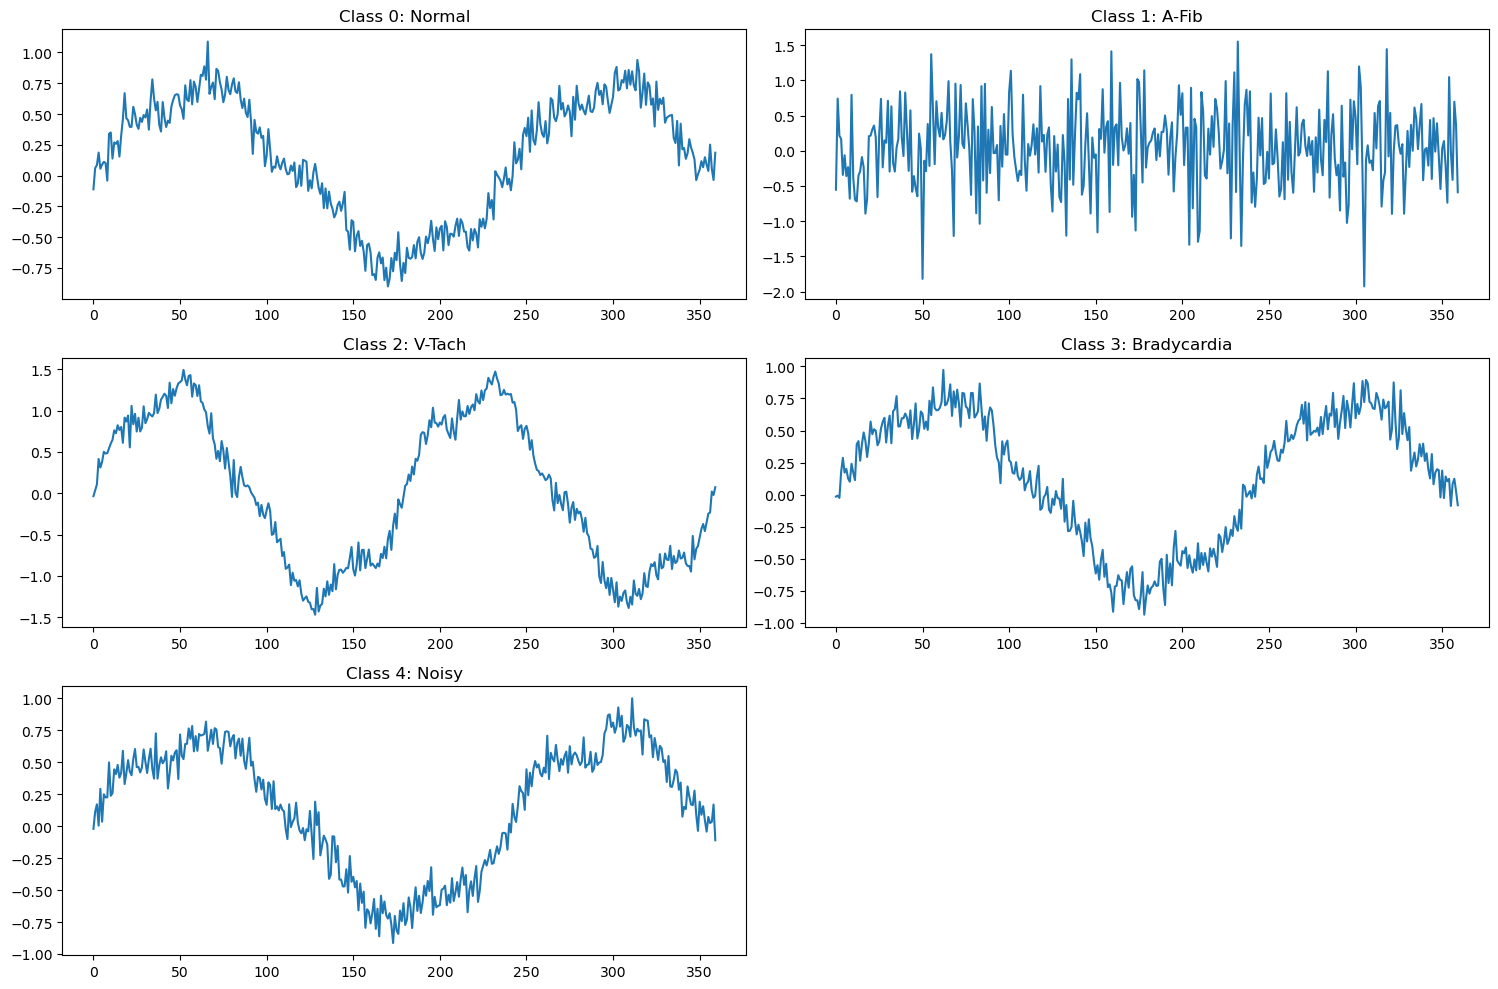

C:\Users\mjeba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 356, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 178, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 176, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 176, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,757 (167.02 KB)

 Trainable params: 42,501 (166.02 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6772 - loss: 0.8754 - val_accuracy: 0.4167 - val_loss: 1.4193
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9816 - loss: 0.1143 - val_accuracy: 0.4167 - val_loss: 1.5018
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9967 - loss: 0.0478 - val_accuracy: 0.4167 - val_loss: 1.3811
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9959 - loss: 0.0225 - val_accuracy: 0.4167 - val_loss: 1.2093
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.5458 - val_loss: 0.9964
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9973 - loss: 0.0139 - val_accuracy: 0.6292 - val_loss: 1.2539
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9428 - loss: 0.2108 - val_accuracy: 0.6333 - val_loss: 0.9589
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9967 - loss: 0.0204 - val_accuracy: 0.6917 - v

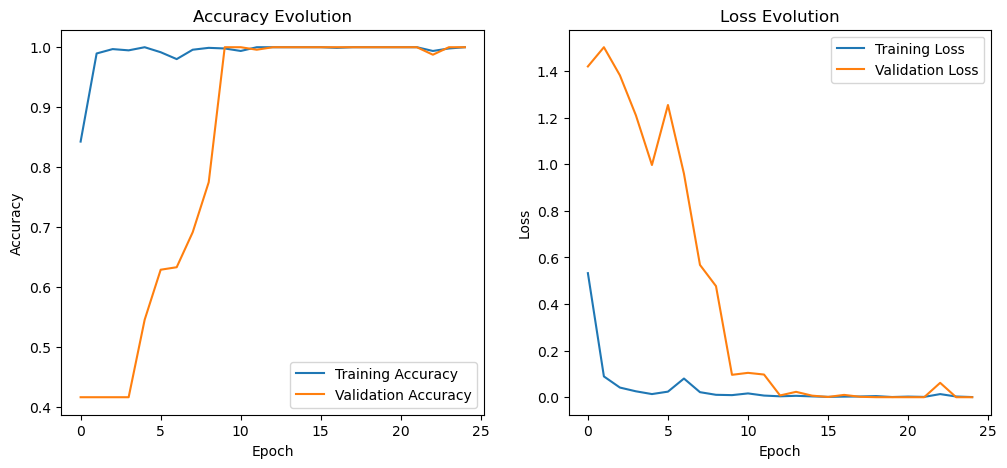


Best Validation Accuracy: 100.00%
Final Validation Accuracy: 100.00%
Test Accuracy: 100.00%
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        50
       A-Fib       1.00      1.00      1.00        63
      V-Tach       1.00      1.00      1.00        59
 Bradycardia       1.00      1.00      1.00        66
       Noisy       1.00      1.00      1.00        62

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [4]:
# %% [markdown]
# # ECG Classification System
# ## Cardiac Disorder Classification using Deep Learning

# %% [markdown]
# ### Import Required Libraries
# %%
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# %% [markdown]
# ## 1. Synthetic Data Generation
# Creating simulated ECG signals for training
# %%
def generate_synthetic_data(num_samples=1500, signal_length=360):
    np.random.seed(42)
    signals = []
    labels = []
    
    # Different signal patterns
    patterns = [
        # Normal pattern
        lambda t: 1.2*np.sin(2*np.pi*t) + 0.2*np.sin(8*np.pi*t),
        # Atrial Fibrillation
        lambda t: 0.8*np.sin(3*np.pi*t) + 0.4*np.random.randn(len(t)),
        # Ventricular Tachycardia
        lambda t: 1.5*np.sin(4*np.pi*t) * (1 + 0.3*np.heaviside(t%1-0.9, 0.5)),
        # Bradycardia
        lambda t: 0.7*np.sin(1.5*np.pi*t) + 0.1*np.sin(6*np.pi*t),
        # Noisy signal
        lambda t: 0.5*np.random.randn(len(t))
    ]
    
    for _ in range(num_samples):
        class_idx = np.random.randint(0, 5)
        t = np.linspace(0, 2, signal_length)
        base_signal = patterns[class_idx](t)
        noise = np.random.normal(0, 0.1, signal_length)
        signals.append(base_signal + noise)
        labels.append(class_idx)
    
    return np.array(signals), np.array(labels)

signals, labels = generate_synthetic_data()

# %% [markdown]
# ## 2. Data Visualization
# Display generated signal samples
# %%
class_names = ['Normal', 'A-Fib', 'V-Tach', 'Bradycardia', 'Noisy']
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.plot(signals[i])
    plt.title(f'Class {i}: {class_names[i]}')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3. Data Preprocessing
# %%
# Normalization
signals = (signals - np.mean(signals)) / np.std(signals)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Add channel dimension
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# %% [markdown]
# ## 4. Model Architecture
# %%
model = models.Sequential([
    layers.Conv1D(64, 5, activation='relu', input_shape=(360, 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# %% [markdown]
# ## 5. Model Training
# %%
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# %% [markdown]
# ## 6. Performance Evaluation
# %%
# Training history visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# %% [markdown]
# ### Final Results
# %%
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\nBest Validation Accuracy: {max(history.history['val_accuracy']):.2%}")
print(f"Final Validation Accuracy: {val_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")

# Classification report
predictions = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=class_names))